### Traveling salesman problem - Baseline

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/distances.csv')
df.head()

,Unnamed: 0,Start,Target,Distance
0,0,Aberdeen,Aberdeen,0
1,1,Aberdeen,Adelaide,16192
2,2,Aberdeen,Algiers,2291
3,3,Aberdeen,Amsterdam,696
4,4,Aberdeen,Ankara,3158


In [3]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,Start,Target,Distance
0,Aberdeen,Aberdeen,0
1,Aberdeen,Adelaide,16192
2,Aberdeen,Algiers,2291
3,Aberdeen,Amsterdam,696
4,Aberdeen,Ankara,3158


In [4]:
cities = df['Start'].unique()
print(cities)

['Aberdeen' 'Adelaide' 'Algiers' 'Amsterdam' 'Ankara' 'Asuncin' 'Athens'
 'Auckland' 'Bangkok' 'Barcelona' 'Beijing' 'Belm' 'Belfast' 'Belgrade'
 'Berlin' 'Birmingham' 'Bogot' 'Bombay' 'Bordeaux' 'Bremen' 'Brisbane'
 'Bristol' 'Brussels' 'Bucharest' 'Budapest' 'Buenos Aires' 'Cairo'
 'Calcutta' 'Canton' 'Cape Town' 'Caracas' 'Cayenne' 'Chihuahua'
 'Chongqing' 'Copenhagen' 'Crdoba' 'Dakar' 'Darwin' 'Djibouti' 'Dublin'
 'Durban' 'Edinburgh' 'Frankfurt' 'Georgetown' 'Glasgow' 'Guatemala City'
 'Guayaquil' 'Hamburg' 'Hammerfest' 'Havana' 'Helsinki' 'Hobart'
 'Hong Kong' 'Iquique' 'Irkutsk' 'Jakarta' 'Johannesburg' 'Kingston'
 'Kinshasa' 'Kuala Lumpur' 'La Paz' 'Leeds' 'Lima' 'Lisbon' 'Liverpool'
 'London' 'Lyons' 'Madrid' 'Manchester' 'Manila' 'Marseilles' 'Mazatln'
 'Mecca' 'Melbourne' 'Mexico City' 'Milan' 'Montevideo' 'Moscow' 'Munich'
 'Nagasaki' 'Nagoya' 'Nairobi' 'Nanjing (Nanking)' 'Naples' 'New Delhi'
 'Newcastle-on-Tyne' 'Odessa' 'Osaka' 'Oslo' 'Panama City' 'Paramaribo'
 'Paris' 

In [5]:
city_distances_dict = dict(zip(df['Start'] + df['Target'], df['Distance']))
city_distances_dict

{'AberdeenAberdeen': 0,
 'AberdeenAdelaide': 16192,
 'AberdeenAlgiers': 2291,
 'AberdeenAmsterdam': 696,
 'AberdeenAnkara': 3158,
 'AberdeenAsuncin': 10521,
 'AberdeenAthens': 2849,
 'AberdeenAuckland': 17748,
 'AberdeenBangkok': 9469,
 'AberdeenBarcelona': 1779,
 'AberdeenBeijing': 7796,
 'AberdeenBelm': 7709,
 'AberdeenBelfast': 367,
 'AberdeenBelgrade': 2076,
 'AberdeenBerlin': 1119,
 'AberdeenBirmingham': 526,
 'AberdeenBogot': 8511,
 'AberdeenBombay': 7339,
 'AberdeenBordeaux': 1374,
 'AberdeenBremen': 829,
 'AberdeenBrisbane': 16186,
 'AberdeenBristol': 632,
 'AberdeenBrussels': 817,
 'AberdeenBucharest': 2411,
 'AberdeenBudapest': 1785,
 'AberdeenBuenos Aires': 11476,
 'AberdeenCairo': 3969,
 'AberdeenCalcutta': 7948,
 'AberdeenCanton': 9267,
 'AberdeenCape Town': 10308,
 'AberdeenCaracas': 7530,
 'AberdeenCayenne': 7267,
 'AberdeenChihuahua': 8148,
 'AberdeenChongqing': 8292,
 'AberdeenCopenhagen': 918,
 'AberdeenCrdoba': 11430,
 'AberdeenDakar': 4897,
 'AberdeenDarwin': 13661,

In [6]:
def all_cities_visited_simulation(cities:list, city_distances_dict:dict):
    total_distance = 0
    start = None
    target = None
    
    for city in cities:
        if not (start):
            start = city
            continue
     
        target = city
        total_distance += city_distances_dict[start + target]
        start = target
        target = None
    return total_distance

In [7]:
distances = []

for i in range(10000):
    np.random.shuffle(cities)
    distances.append(all_cities_visited_simulation(cities=cities, city_distances_dict=city_distances_dict))
  
print(f'Baseline minimal distance: {min(distances)} km')

Baseline minimal distance: 791588 km


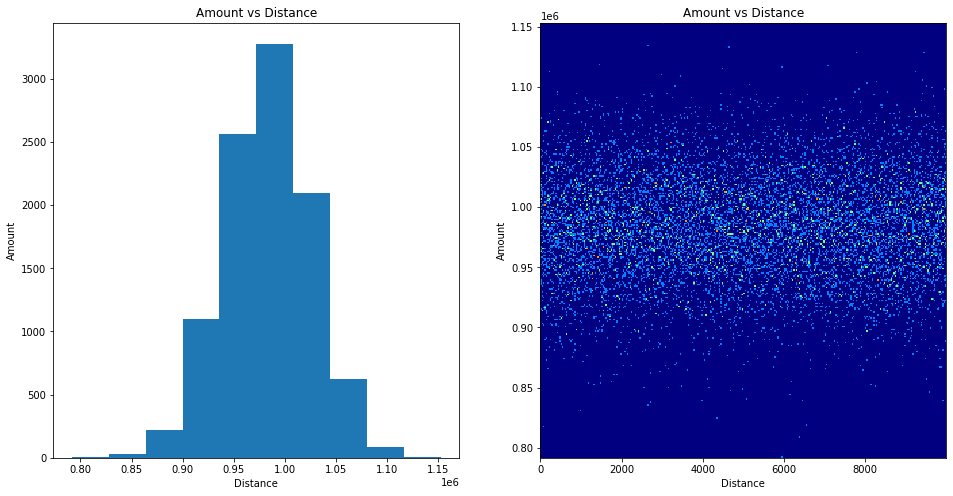

In [8]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.hist(distances)
plt.xlabel('Distance')
plt.ylabel('Amount')
plt.title("Amount vs Distance")

plt.subplot(1, 2, 2)
plt.hist2d([i for i in range(10000)], distances, bins=(300, 300), cmap=plt.cm.jet)
plt.xlabel('Distance')
plt.ylabel('Amount')
plt.title("Amount vs Distance")

plt.show()